# Assignment 4, 
## Part 1: 
### Data Exploration
    1) Read in bike_share_hour.csv as a pandas dataframe. The columns are
    described in the bike_share_readme.txt if you need more information
    about them.
    2) Look at the dataset, and convert the columns that are categorical to a
    pandas “category” type.
    3) Look for non-null values in the dataset.
    4) Do a descriptive analysis of the numeric columns.=
    5) Implement a bar plot of cnt versus season. Document which season has
    the most bike rides and which season has the least.
    6) Implement a bar chart for working day versus count. Document how bike
    rides are distributed across these two classes.
    7) Implement a bar chart for month versus count. Document which months
    have the most bike rides.
    8) Implement code to figure out which months belong to which seasons.
    9) Implement a bar plot of weathersit versus cnt. Document which weather
    situation has less bike rentals.
    10) Implement a point plot of weathersit on the x-axis, count on the y-axis, and
    the season as the hue. Document how season and weathersit are related.
    11) Implement a bar plot of hour versus count. Are there any specific hours
    that are busier than others?
    12) Implement a bar plot of hour versus count on weekends and holidays
    (when workingday = 0). Does the hourly trend change on weekends?

## Part 2: 
### Data Preparation
    1) Implement and graph a correlation matrix with the remaining numeric
    features. Any interesting relationships?
    2) Scale the numerical features using StandardScaler(), and replace the
    original columns in your dataframe.
    3) Drop the following columns from your dataset: casual, registered, dteday,
    instant.
    4) Implement a histogram of the count column. What can be said based on
    the resulting distribution?
    5) Implement a train/test split with a test size of 33%.
    6) Implement a baseline linear regression algorithm. Use cross-validation to
    output r2 and mse. Calculate RMSE base on mse. Document your scores.
## Part 3: 
### Model Training (Hint: trained all of these with a for loop and added my results to a PrettyTable.)
    1)Create one-hot-encoded values for your categorical columns using
    get_dummies and add them to your source dataset.
    2) Drop the original categorical columns from your source dataset.
    3) Do a test/train split based on your new source dataset. Implement and fit a
    new linear model on your new training set.
    4) What are the new values for r2, mse, and rmse?
    5) Implement and score a decision tree regressor with random_state=0.
    6) Implement and score a RandomForestRegressor with random_state=0
    and n_esitmators=30.
    7) Implement and score an SGDRegressor with max_iter=1000 and tol=1e3).
    8) Implement and score a Lasso Regressor with alpha=0.1.
    9) Implement and score an ElasticNet Regressor with random_state=0.
    10) Implement and score a Ridge Regressor with alpha=0.5.
    11) Implement and score a BaggingRegressor.
 
## Part 4: 
### Model Tuning
    1) Take the top three performing models and implement cross-validation on
    them. ▪ Hint: They should be Decision Tree Regressor, RandomForestRegressor, and BaggingRegressor.
    2) Take your top performing model (mine was the RandomForestRegressor)
    and do a randomize search cv with 20 iterations and three folds.
    ▪ I found it is best to set your n_jobs = (# of cpu’s you have – 1). This
    took about 10 minutes on my MacBook with 4 CPUs and 8 GB of
    memory.
    ▪ Your param distributions should include the following:
    3) Bootstrap: true, false
    4) Max_depth: 10-110, number of bins 11
    5) Max_features: auto, sqrt
    6) Min_samples_split: 2,5,10
    7) Min_samples_leaf: 1,2,4
    8) 200 – 2000, number of bins 10
    9) Take your best_estimator_ and see how it compares by doing cross_vals
    for r2, mse, and calculating rmse.
    Finally, run predictions on your test set with this model, and see how your r2 score and
    RMSE look.

__________________________________________________________________________________________________________________________________________

## Part 1: 
### Data Exploration
    1) Read in bike_share_hour.csv as a pandas dataframe. The columns are
    described in the bike_share_readme.txt if you need more information
    about them.
    2) Look at the dataset, and convert the columns that are categorical to a
    pandas “category” type.
    3) Look for non-null values in the dataset.
    4) Do a descriptive analysis of the numeric columns.=
    5) Implement a bar plot of cnt versus season. Document which season has
    the most bike rides and which season has the least.
    6) Implement a bar chart for working day versus count. Document how bike
    rides are distributed across these two classes.
    7) Implement a bar chart for month versus count. Document which months
    have the most bike rides.
    8) Implement code to figure out which months belong to which seasons.
    9) Implement a bar plot of weathersit versus cnt. Document which weather
    situation has less bike rentals.
    10) Implement a point plot of weathersit on the x-axis, count on the y-axis, and
    the season as the hue. Document how season and weathersit are related.
    11) Implement a bar plot of hour versus count. Are there any specific hours
    that are busier than others?
    12) Implement a bar plot of hour versus count on weekends and holidays
    (when workingday = 0). Does the hourly trend change on weekends?

In [70]:
import pandas as pd
import numpy as np
import sweetviz
import matplotlib.pyplot as plt
from seaborn import pointplot, heatmap
from sklearn import preprocessing, model_selection, linear_model, metrics, tree, ensemble

In [71]:
bike_share_data = pd.read_csv("bike_share_hour.csv", index_col = [0])

To begin we are going to be performing exploratory data analysis:  

#### Categorical: 
- dteday: the date of the rental
- season: season of the rental
- yr: year of the rental
- mnth: month of the rental
- hr: which hour of the day
- holiday: whether it is a holiday or not
- weekday: which day of the week
- workingday: if it's a working day
- weathersit: the weather out

#### Numerical:
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



In [72]:
bike_share_data.sample(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
7588,2011-11-17,4,0,11,18,0,4,1,1,0.32,0.3182,0.39,0.1940,9,298,307
14330,2012-08-25,3,1,8,6,0,6,0,2,0.64,0.5909,0.78,0.1642,5,25,30
10609,2012-03-23,2,1,3,3,0,5,1,1,0.52,0.5000,0.88,0.1045,4,6,10
14362,2012-08-26,3,1,8,14,0,0,0,1,0.64,0.5758,0.89,0.1045,125,252,377
3397,2011-05-26,2,0,5,10,0,4,1,1,0.70,0.6667,0.74,0.2836,49,94,143
11020,2012-04-09,2,1,4,7,0,1,1,1,0.42,0.4242,0.28,0.1940,11,320,331
8733,2012-01-04,1,1,1,16,0,3,1,2,0.18,0.1667,0.40,0.2836,8,123,131
1315,2011-02-27,1,0,2,23,0,0,0,2,0.36,0.3485,0.62,0.1642,6,53,59
16139,2012-11-10,4,1,11,4,0,6,0,1,0.26,0.2727,0.87,0.1045,2,4,6


In [73]:
feature_names = bike_share_data.columns
feature_names

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [74]:
categorical_feature_names = feature_names[:8]
categorical_feature_names

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday'],
      dtype='object')

In [75]:
for name in categorical_feature_names:
    bike_share_data[name] = pd.Categorical(bike_share_data[name])

In [76]:
bike_share_data.yr.head(10)

instant
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: yr, dtype: category
Categories (2, int64): [0, 1]

In [77]:
for feature_name in feature_names:
    print(feature_name, sum(bike_share_data[feature_name].isna()))

dteday 0
season 0
yr 0
mnth 0
hr 0
holiday 0
weekday 0
workingday 0
weathersit 0
temp 0
atemp 0
hum 0
windspeed 0
casual 0
registered 0
cnt 0


In [78]:
exploratory_analysis = sweetviz.analyze(bike_share_data)


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



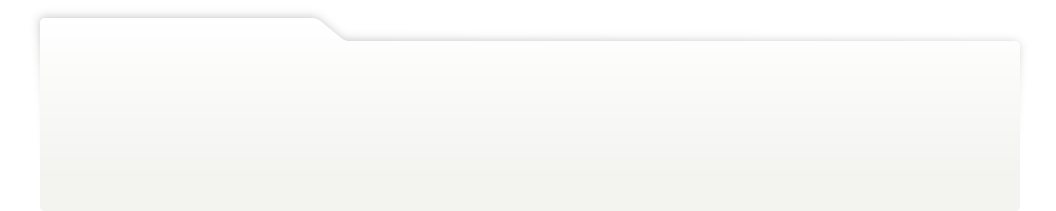
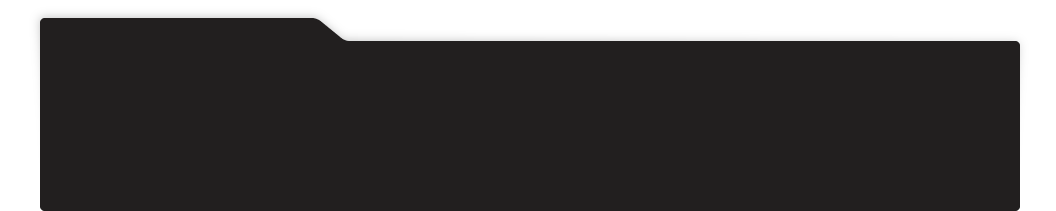
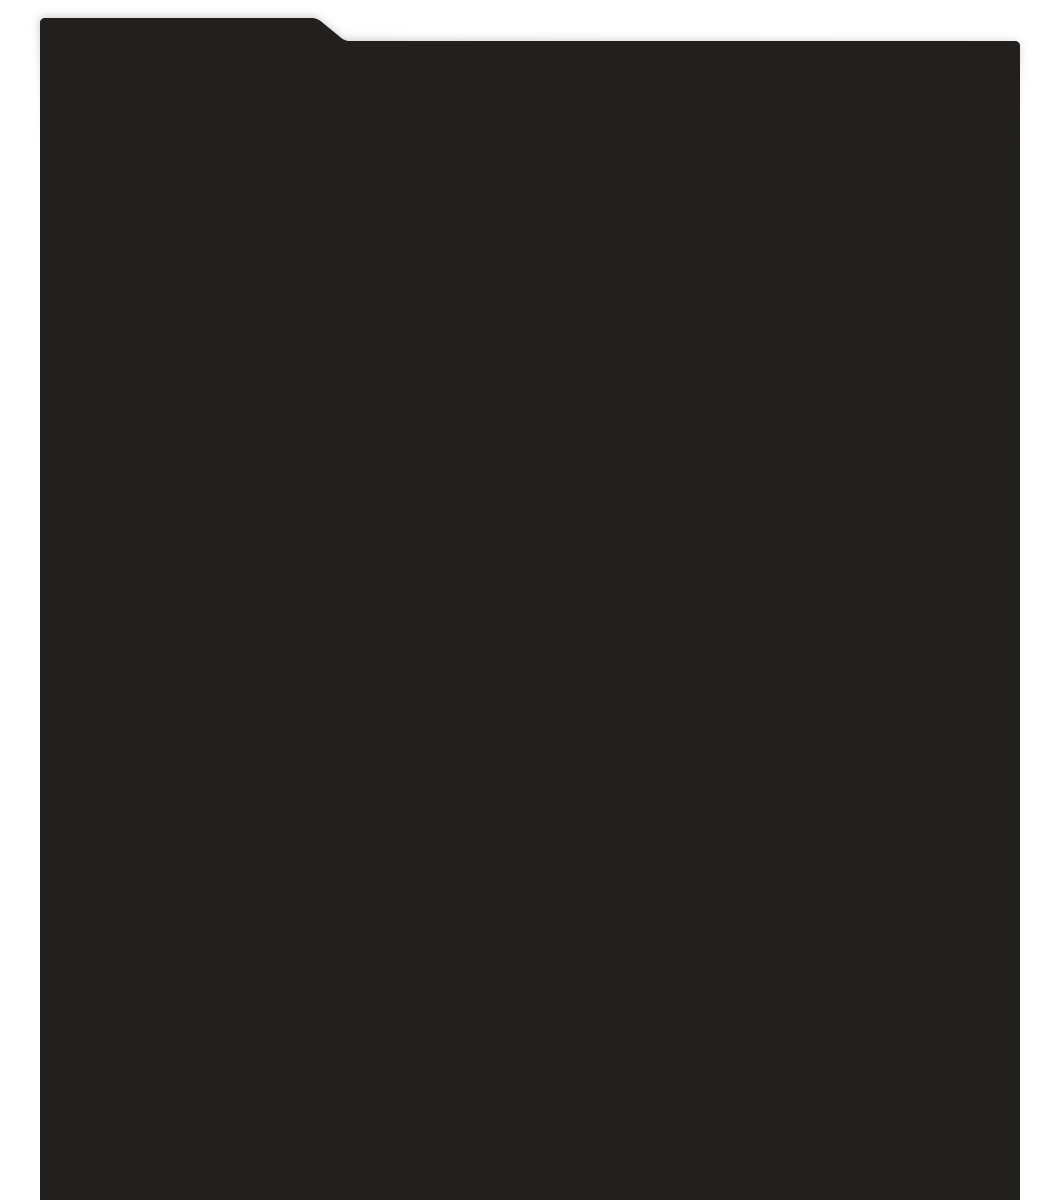
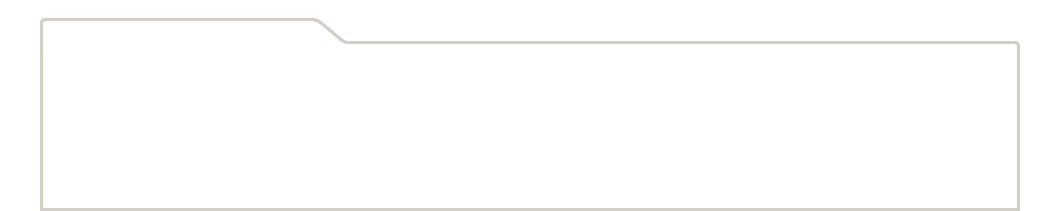
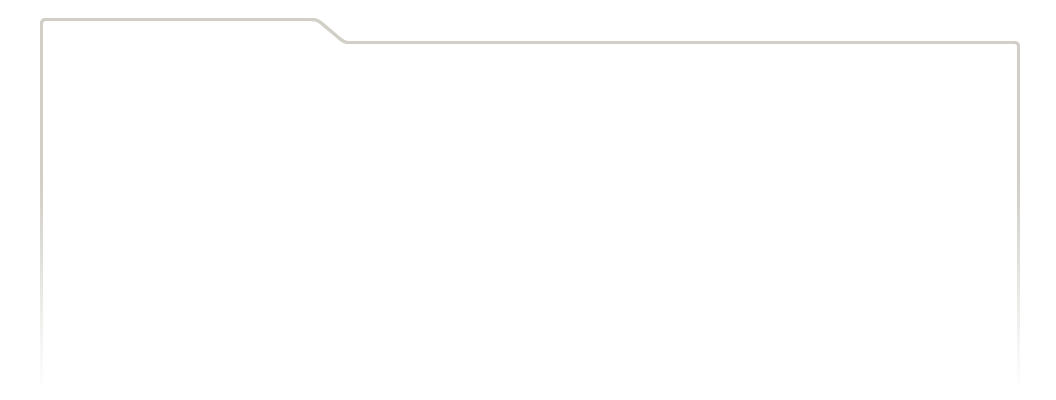
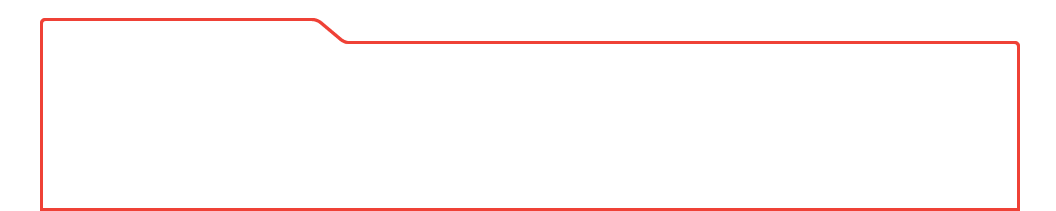
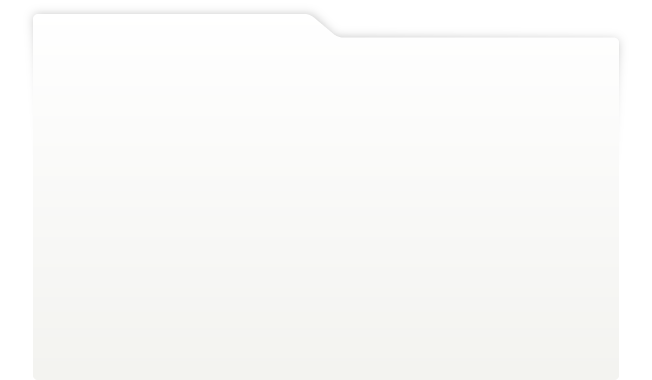
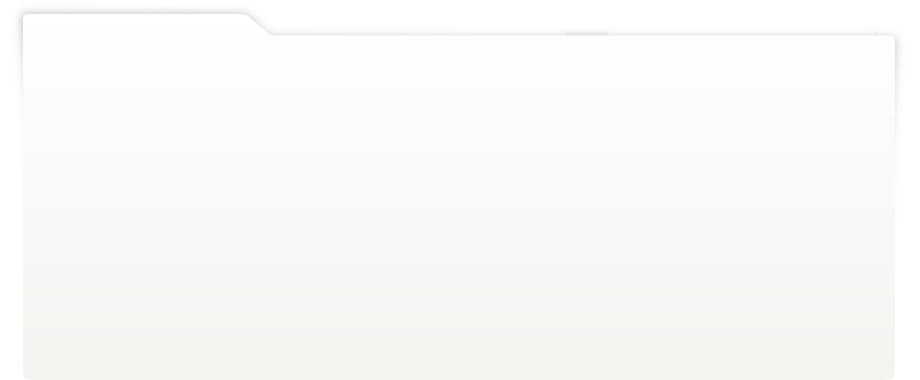
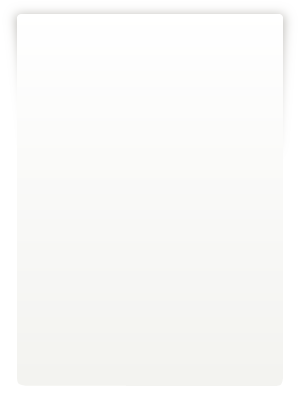
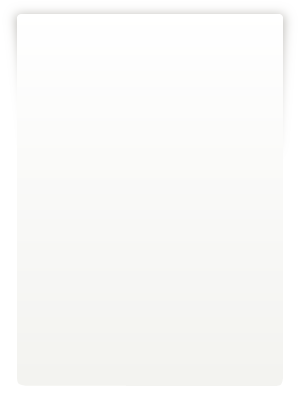
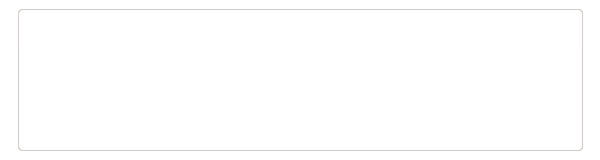
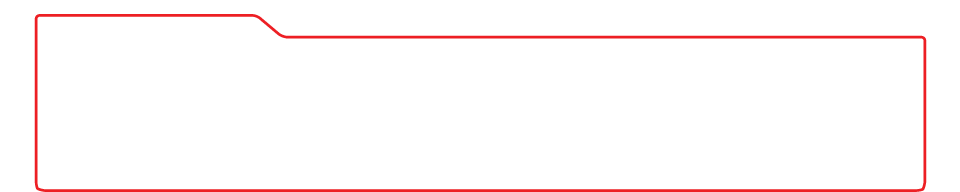
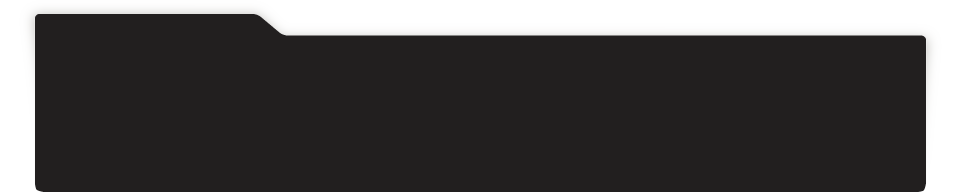
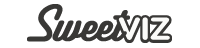
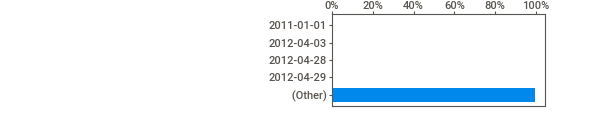
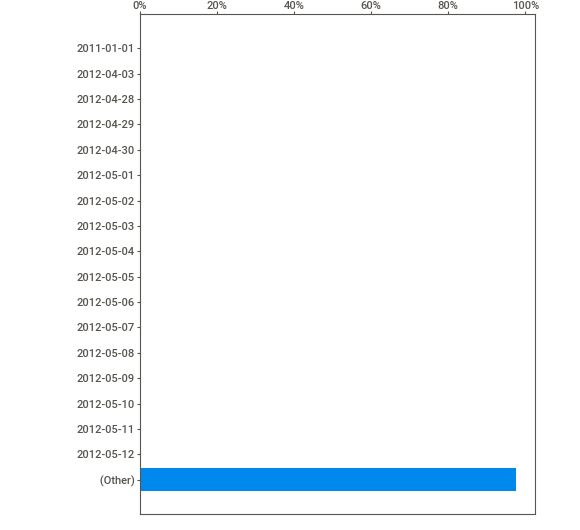
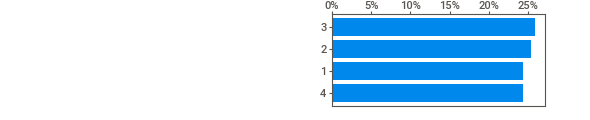
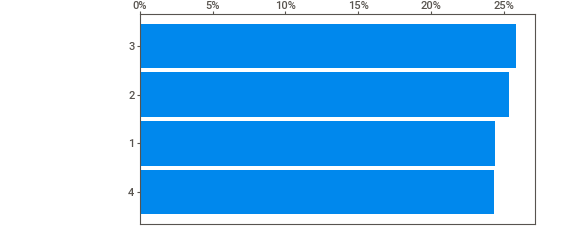
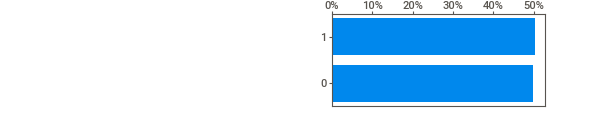
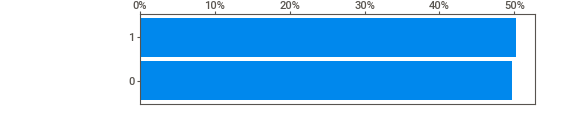
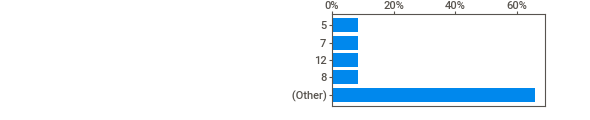
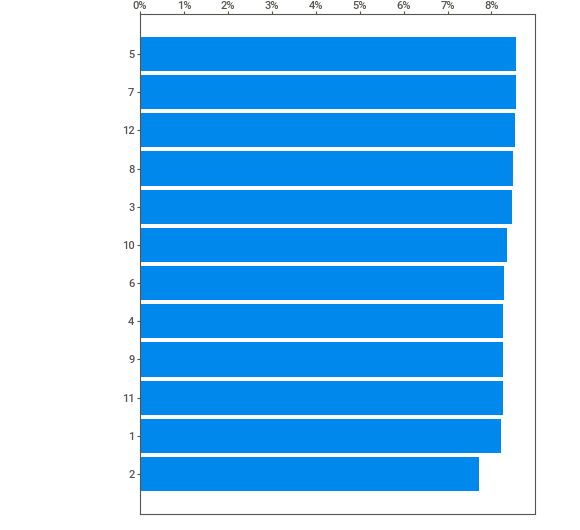
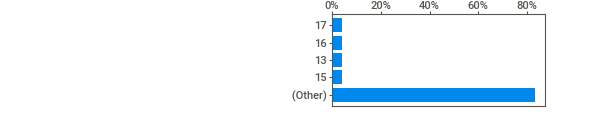
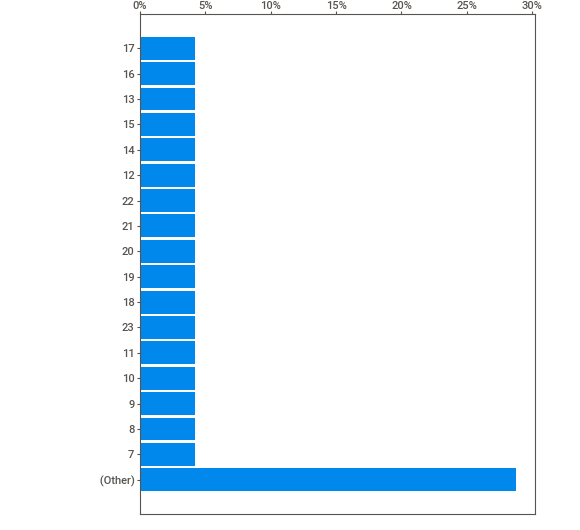
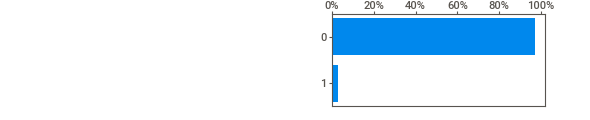
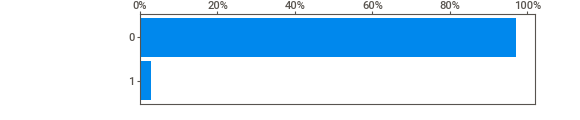
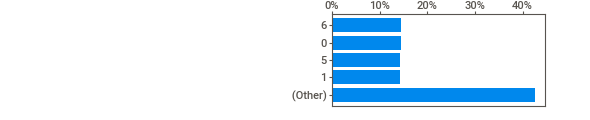
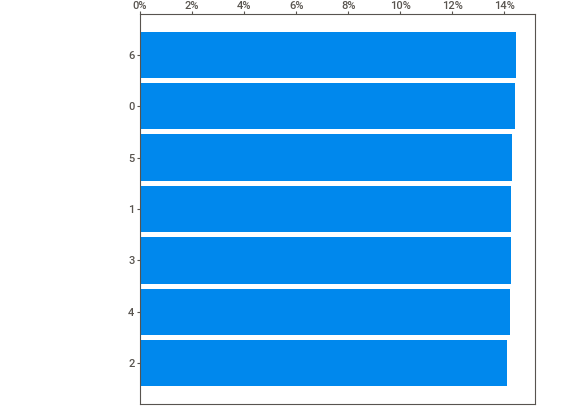
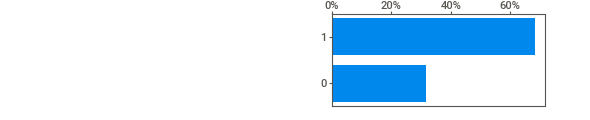
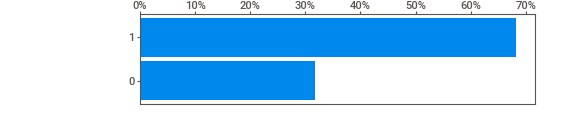
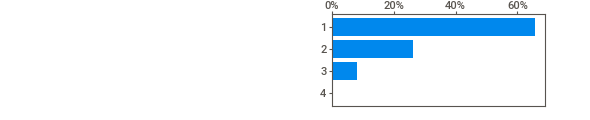
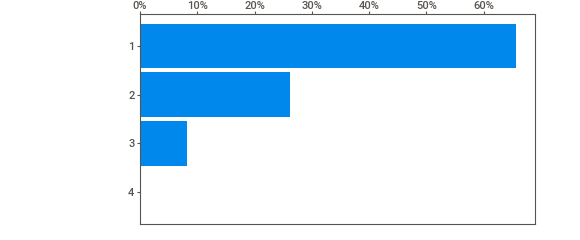
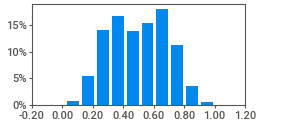
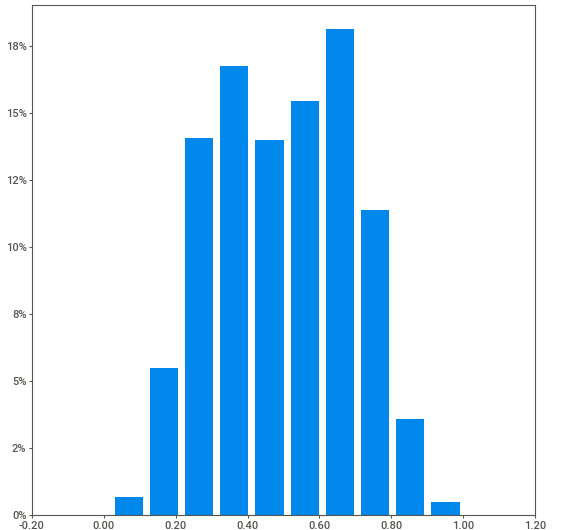
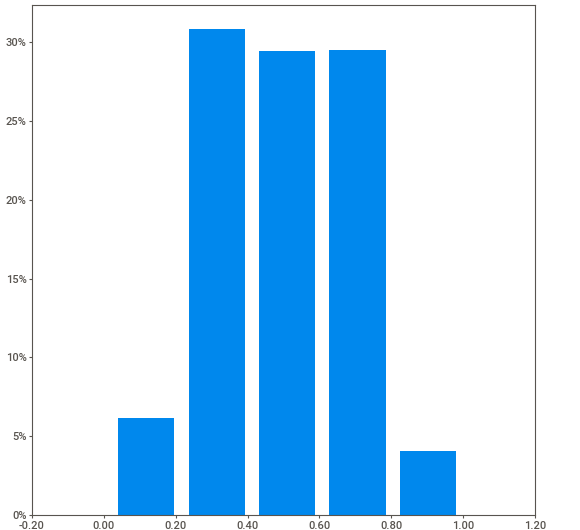
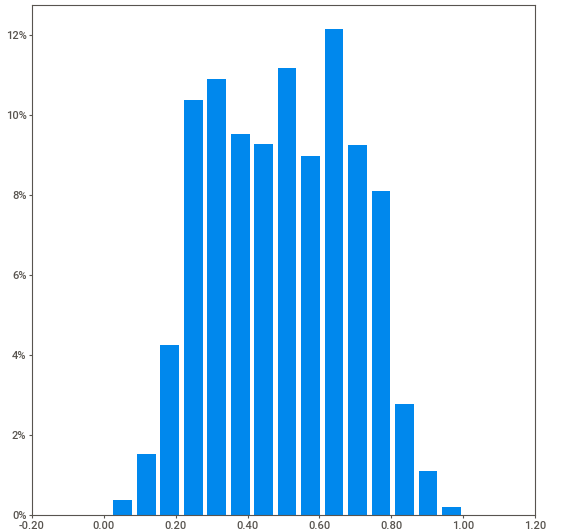
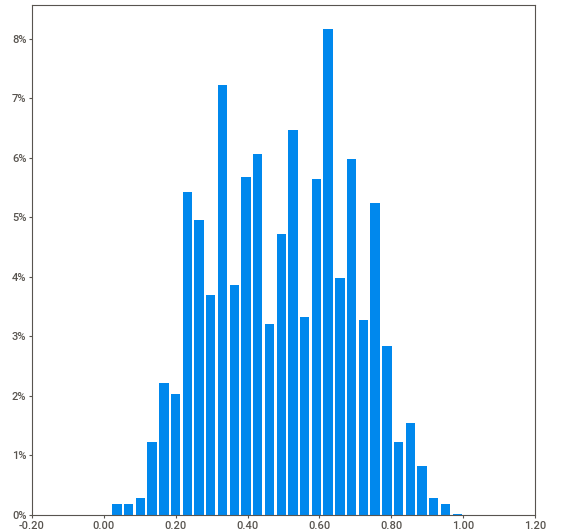
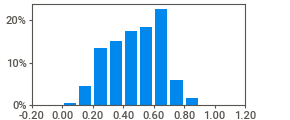
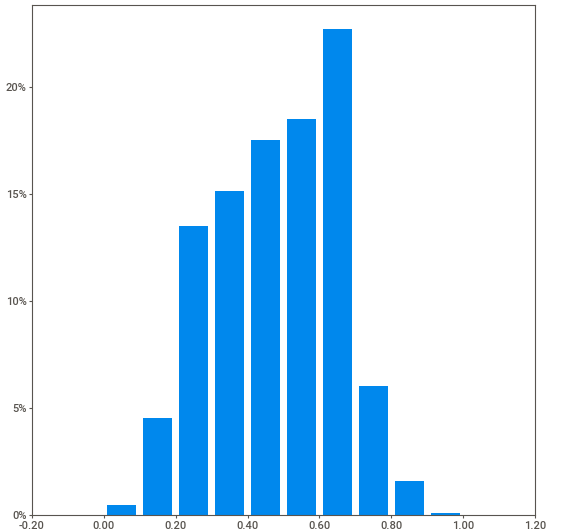
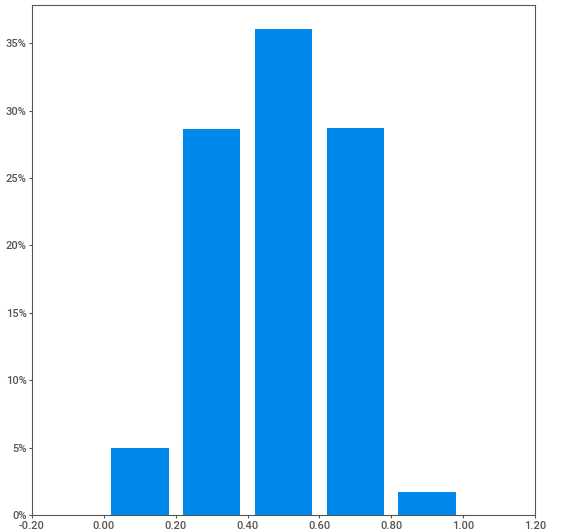
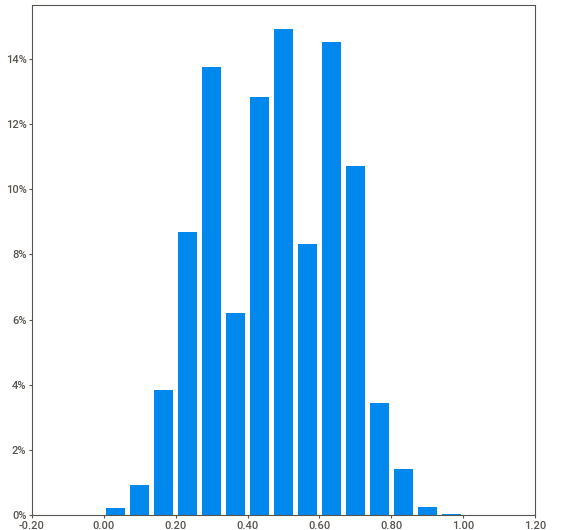
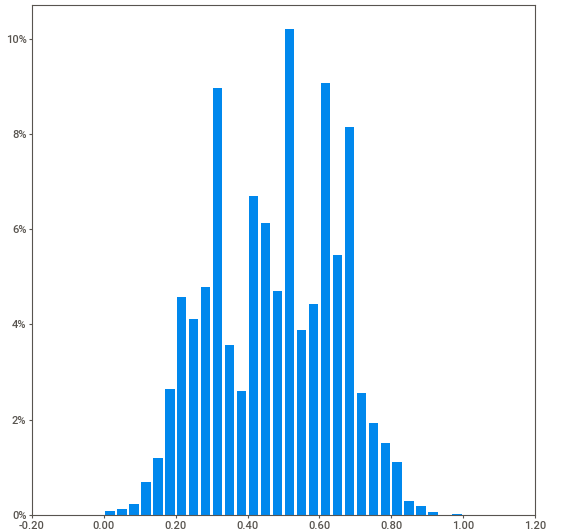
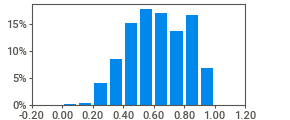
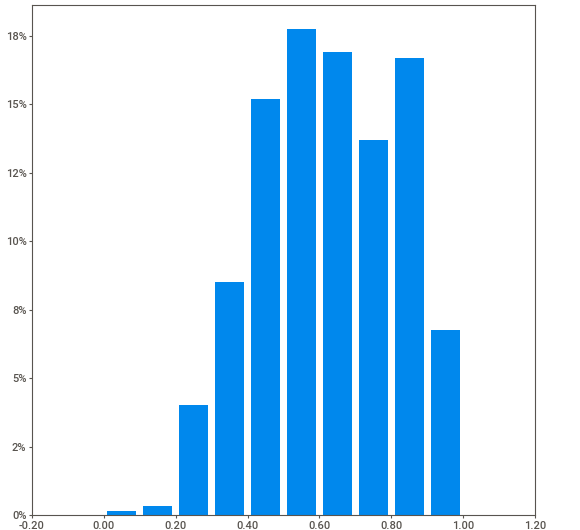
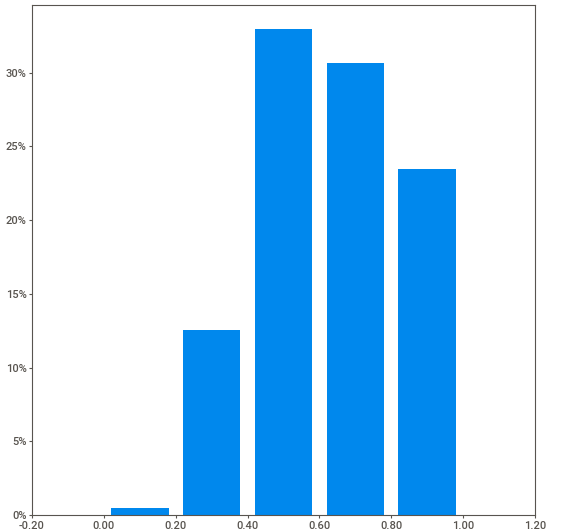
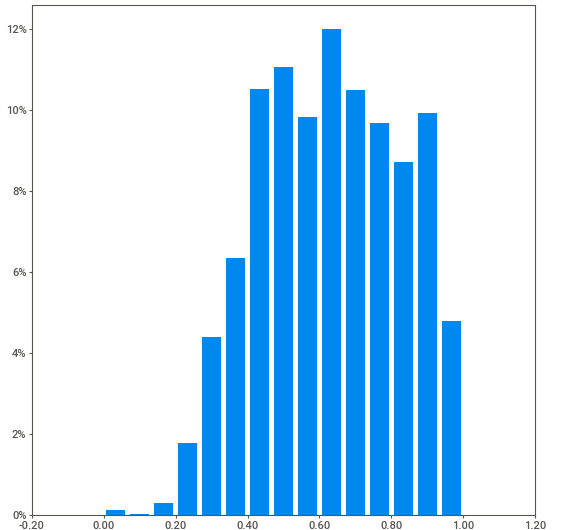
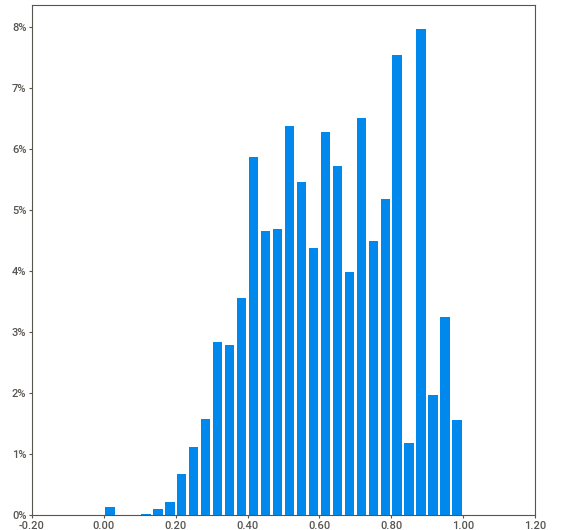
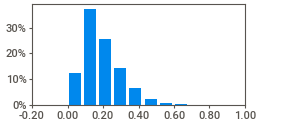
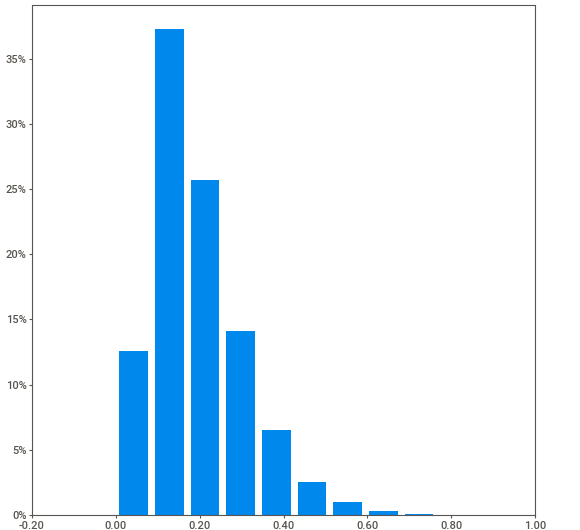
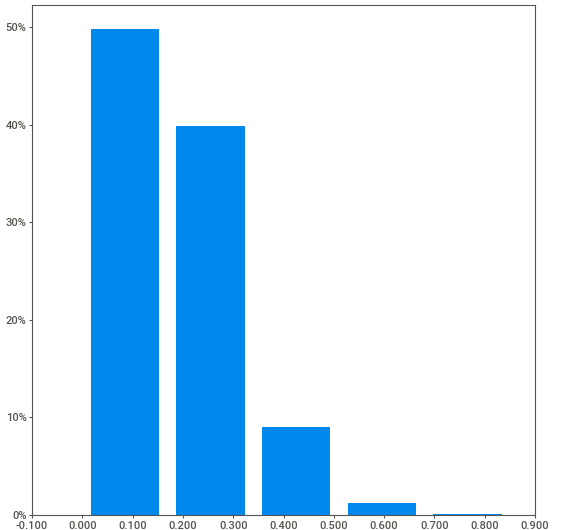
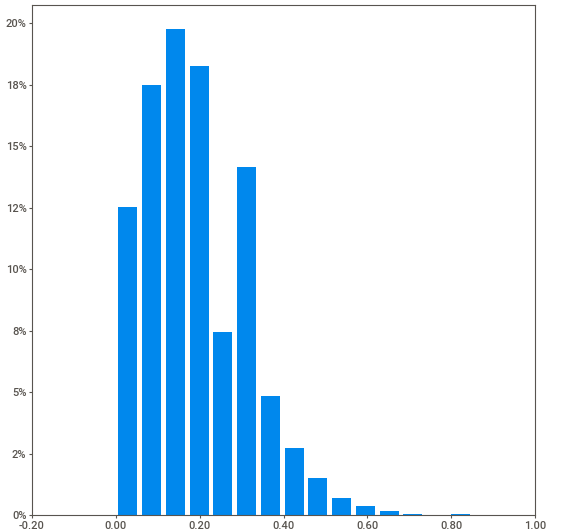
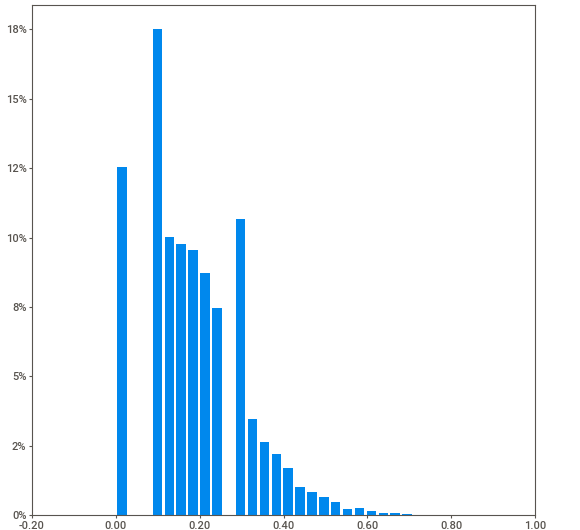
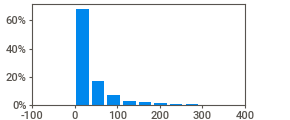
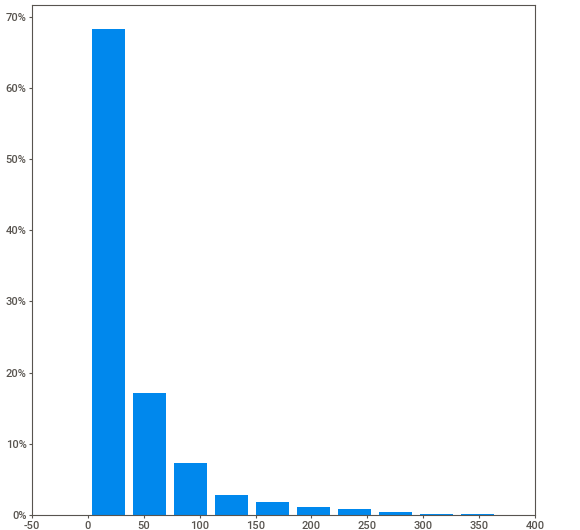
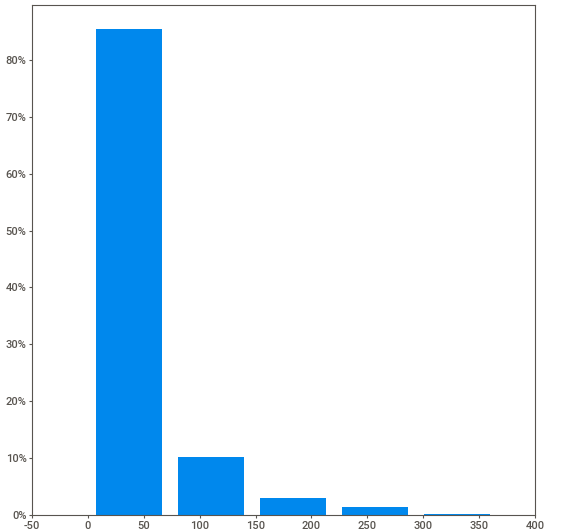
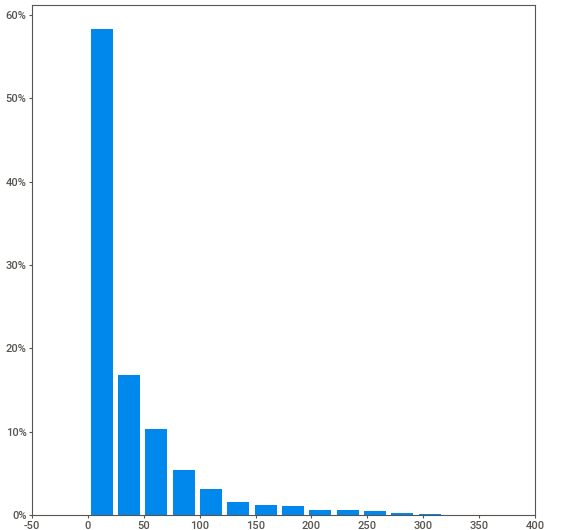
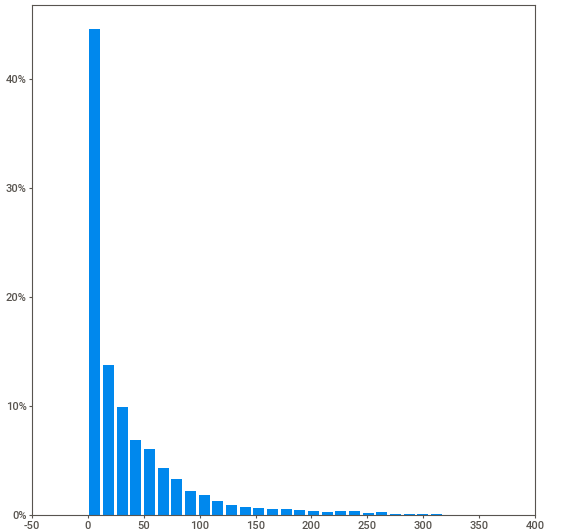
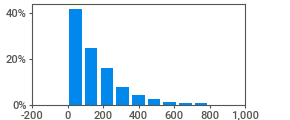
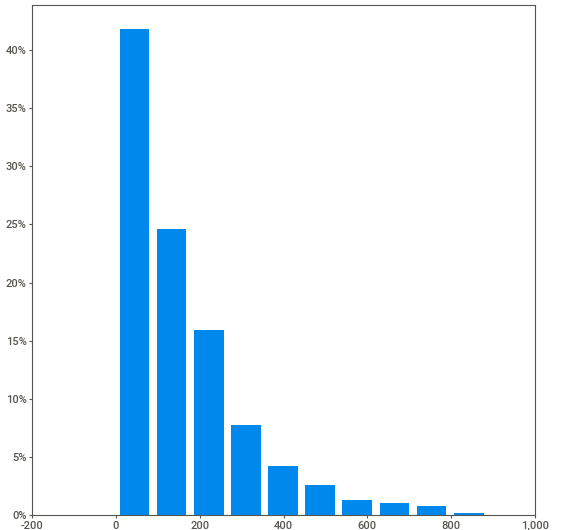
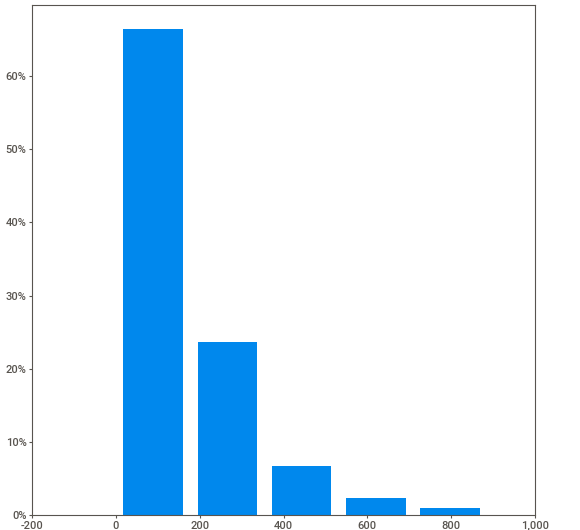
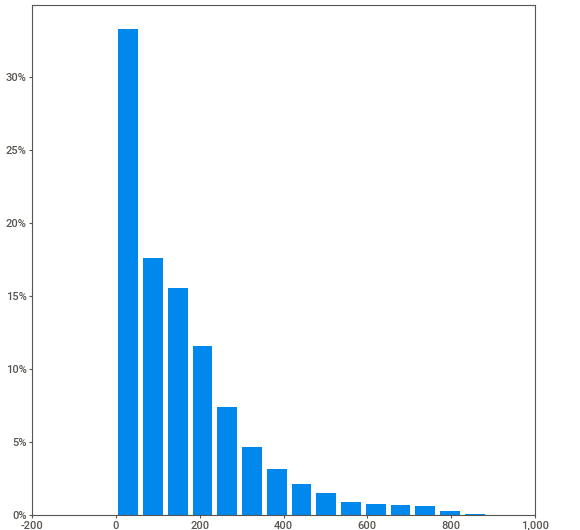
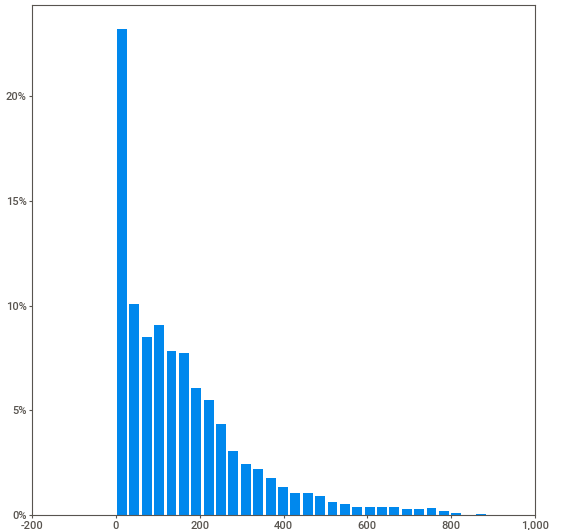
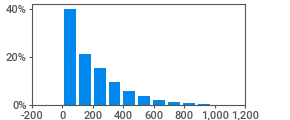
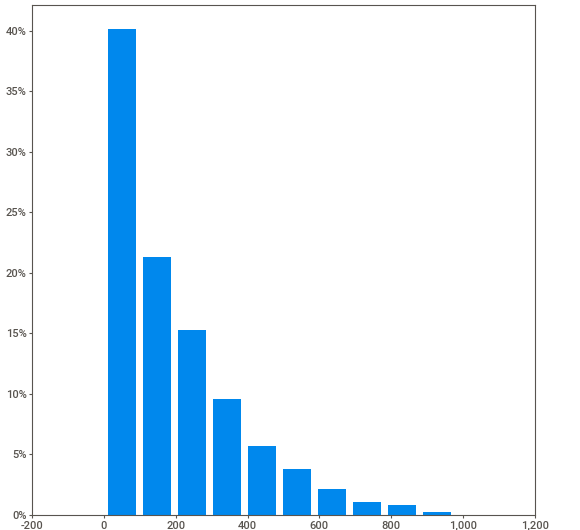
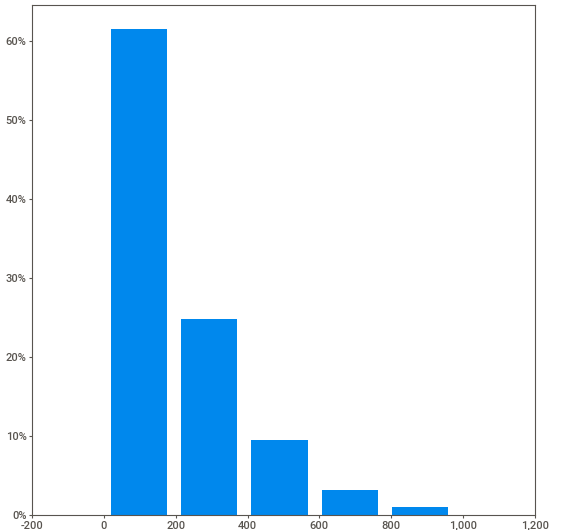
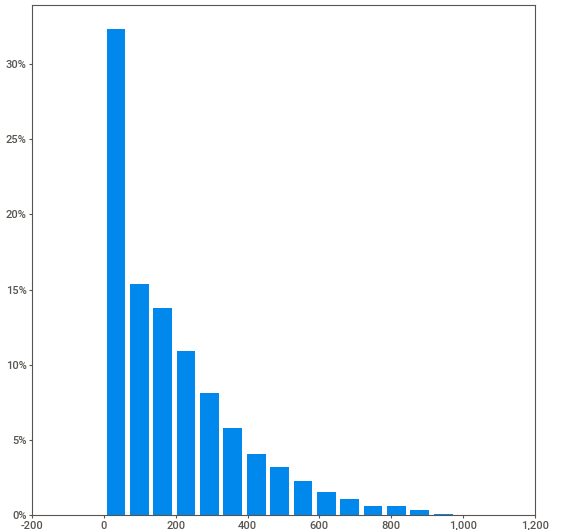
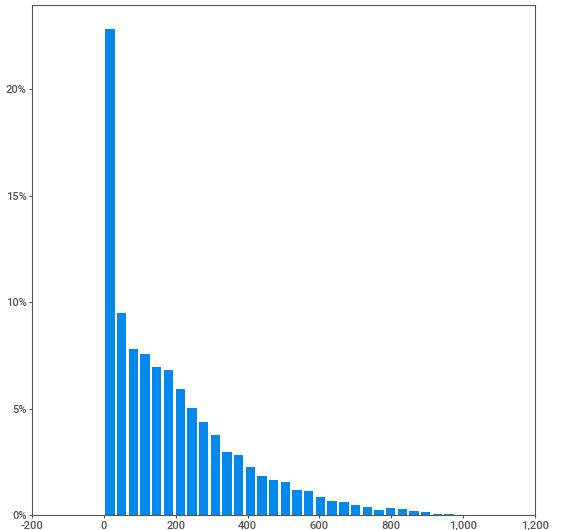
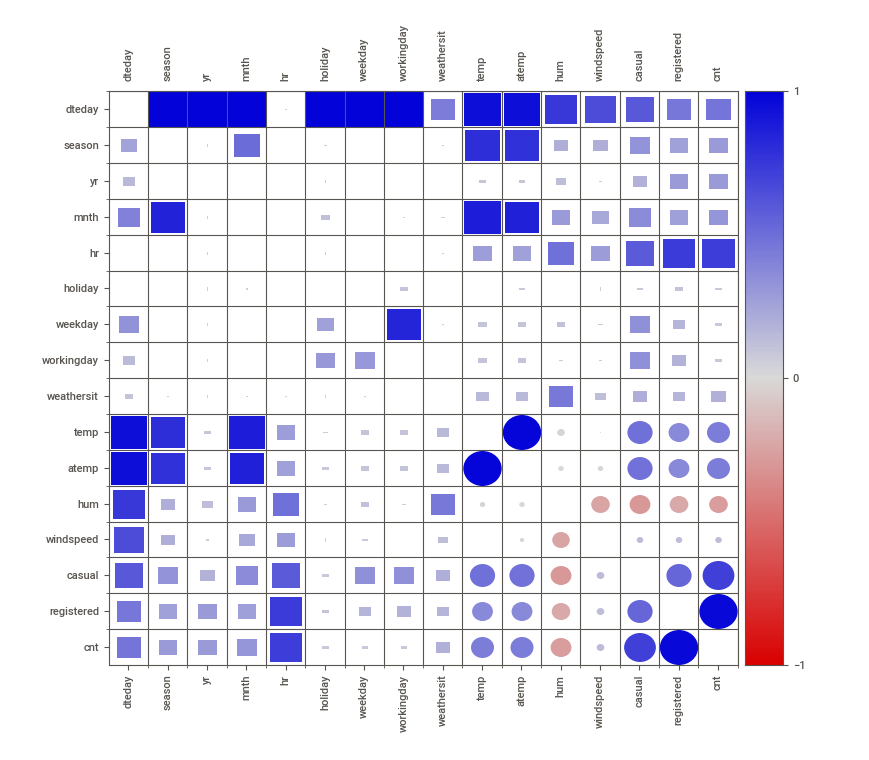
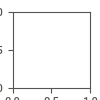

In [79]:
exploratory_analysis.show_notebook()

In [80]:
months = bike_share_data.mnth
months.describe()

count     17379
unique       12
top           5
freq       1488
Name: mnth, dtype: int64

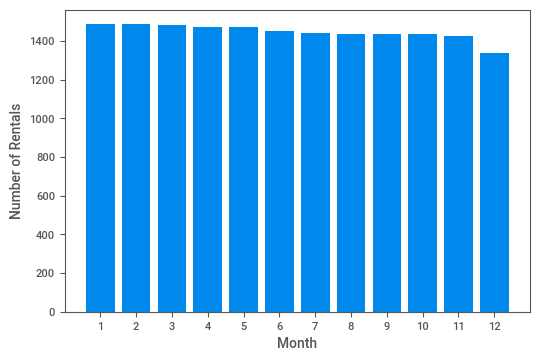

In [81]:
x = [i for i in range(1,13)]
x_str = [str(i) for i in x]
months.value_counts()
plt.bar(x, months.value_counts())
plt.xlabel("Month")
plt.ylabel("Number of Rentals")
plt.xticks(ticks = x, labels = x_str)
plt.show()

In [82]:
months.unique()

[1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [83]:
def months_in_seasons(data_set):
    months_in_season = []
    for season in data_set["season"].unique():
        seasonal_data_set = data_set[data_set["season"] == season]
        months_in_season.append(list(seasonal_data_set["mnth"].unique()))
    return months_in_season        

In [84]:
months_in_seasons(bike_share_data)

[[1, 2, 3, 12], [3, 4, 5, 6], [6, 7, 8, 9], [9, 10, 11, 12]]

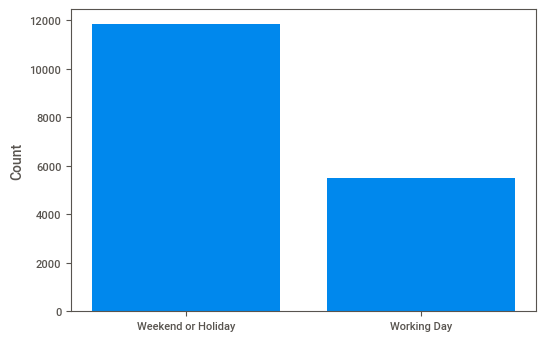

In [85]:
plt.bar(x = [0,1], height = bike_share_data.workingday.value_counts())
plt.ylabel("Count")
plt.xticks(ticks = [0,1], labels = ["Weekend or Holiday","Working Day"])
plt.show()

In [86]:
x = [i for i in range(0, len(bike_share_data.weathersit.unique()))]

# plt.scatter()
# plt.xticks(ticks = x, labels = ["clear", "mist", "light snow / raing", "heavy snow / rain"], rotation = 60)
# plt.ylabel("Count")
# plt.show()



In [87]:
list(bike_share_data.weathersit.value_counts())

[11413, 4544, 1419, 3]

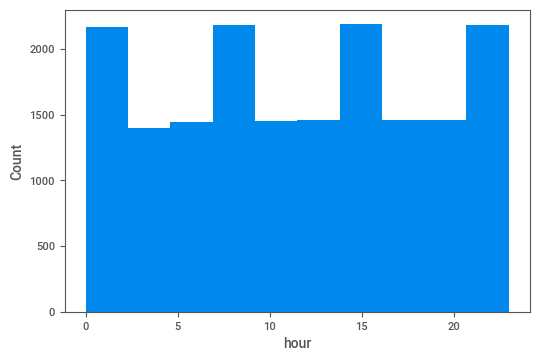

In [88]:
plt.hist(bike_share_data.hr)
plt.xlabel("hour")
plt.ylabel("Count")
plt.show()

In [89]:
bike_share_weekend_holiday_data = bike_share_data[bike_share_data.workingday == 0]


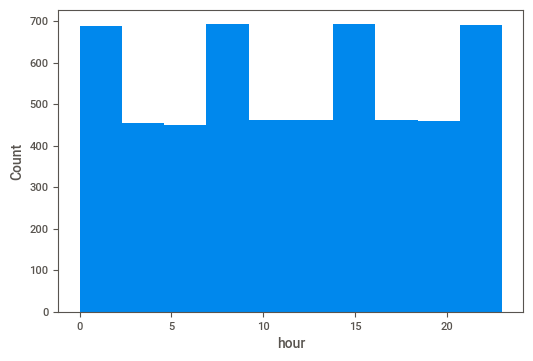

In [90]:
plt.hist(bike_share_weekend_holiday_data.hr)
plt.xlabel("hour")
plt.ylabel("Count")
plt.show()

## Part 2: 
### Data Preparation
    1) Implement and graph a correlation matrix with the remaining numeric
    features. Any interesting relationships?
    2) Scale the numerical features using StandardScaler(), and replace the
    original columns in your dataframe.
    3) Drop the following columns from your dataset: casual, registered, dteday,
    instant.
    4) Implement a histogram of the count column. What can be said based on
    the resulting distribution?
    5) Implement a train/test split with a test size of 33%.
    6) Implement a baseline linear regression algorithm. Use cross-validation to
    output r2 and mse. Calculate RMSE base on mse. Document your scores.

In [91]:
x = [i for i in range(9, 16)]

In [92]:
bike_share_numeric_data = bike_share_data.iloc[:,x]
bike_share_numeric_feature_names = bike_share_numeric_data.columns
bike_share_numeric_feature_names

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

<AxesSubplot:>

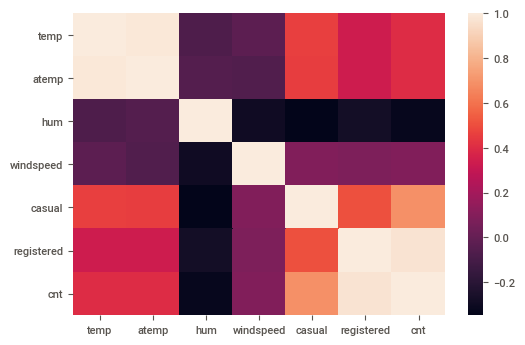

In [93]:
heatmap(bike_share_numeric_data.corr())

In [94]:
scalar = preprocessing.StandardScaler()

scalar.fit_transform(bike_share_numeric_data)

# for feature_name in bike_share_numeric_feature_names:
#     scalar.fit(bike_share_data[feature_name].values.ravel())
#     bike_share_data[feature_name] = scalar.transform(bike_share_data[feature_name])


bike_share_numeric_data.head(10)

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,0.24,0.2879,0.81,0.0000,3,13,16
2,0.22,0.2727,0.80,0.0000,8,32,40
3,0.22,0.2727,0.80,0.0000,5,27,32
4,0.24,0.2879,0.75,0.0000,3,10,13
5,0.24,0.2879,0.75,0.0000,0,1,1
6,0.24,0.2576,0.75,0.0896,0,1,1
7,0.22,0.2727,0.80,0.0000,2,0,2
8,0.20,0.2576,0.86,0.0000,1,2,3
9,0.24,0.2879,0.75,0.0000,1,7,8


In [95]:
columns_to_drop = ["casual", "registered", "dteday"]

In [96]:
bike_share_data = bike_share_data.drop(columns = columns_to_drop)
bike_share_data.head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8


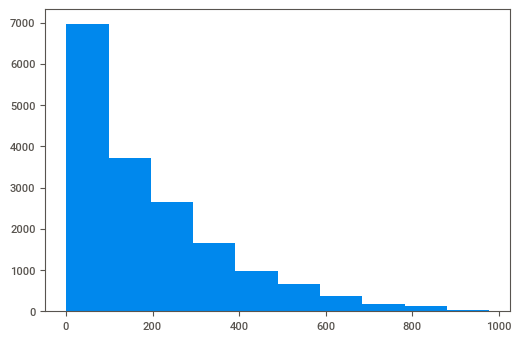

In [97]:
plt.hist(bike_share_data.cnt)
plt.show()

In [98]:
bike_share_train, bike_share_test = model_selection.train_test_split(bike_share_data, test_size = .33)

In [99]:
bike_share_train.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
3943,2,0,6,4,0,6,0,1,0.60,0.5455,0.88,0.0896,5
17352,1,1,12,20,0,0,0,1,0.22,0.1970,0.47,0.3284,72
6801,4,0,10,22,0,6,0,1,0.50,0.4848,0.36,0.1343,166
12325,2,1,6,17,0,6,0,1,0.64,0.6212,0.36,0.0000,586
15151,4,1,9,11,0,5,1,2,0.66,0.6212,0.69,0.0000,361


In [100]:
bike_share_test.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
11125,2,1,4,17,0,5,1,1,0.56,0.5303,0.24,0.1642,738
8155,4,0,12,10,0,0,0,1,0.24,0.2879,0.44,0.0000,194
6935,4,0,10,13,0,5,1,1,0.48,0.4697,0.48,0.3284,206
5145,3,0,8,6,0,0,0,1,0.70,0.6667,0.89,0.1642,13
4500,3,0,7,9,0,1,1,1,0.78,0.7424,0.59,0.2985,208


In [101]:
bike_share_target_train = bike_share_train["cnt"]
bike_share_target_test = bike_share_test["cnt"]

bike_share_train = bike_share_train.drop(columns = ["cnt"])
bike_share_test = bike_share_test.drop(columns = ["cnt"])

In [102]:
linear_regressor = linear_model.LinearRegression()

In [103]:
#linear_model = linear_regressor.fit(bike_share_train, bike_share_target_train)

In [104]:
#linear_predictions = linear_model.predict(bike_share_test)

In [105]:
linear_cross_validated = model_selection.cross_validate(linear_regressor, bike_share_train, bike_share_target_train, return_estimator = True)

In [106]:
print(linear_cross_validated)

{'fit_time': array([0.00600004, 0.00500011, 0.00500083, 0.00600147, 0.00500107]), 'score_time': array([0.00199866, 0.00300097, 0.0030005 , 0.0040009 , 0.00300074]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([0.36844688, 0.39820529, 0.4027645 , 0.39036941, 0.36895054])}


In [107]:
linear_model_optimized = linear_cross_validated["estimator"][4]

In [108]:
linear_optimized_predictions = linear_model_optimized.predict(bike_share_test)

In [109]:
r_squared = metrics.r2_score(bike_share_target_test, linear_optimized_predictions)
linear_mse = metrics.mean_squared_error(bike_share_target_test, linear_optimized_predictions)
linear_rmse = np.sqrt(linear_mse)
print(r_squared)
print(linear_rmse)

0.39186466949444654
142.43285542243592


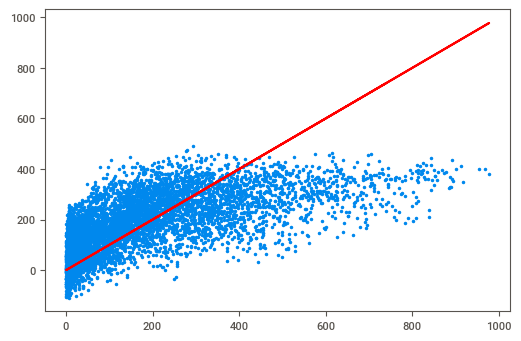

In [110]:
plt.figure(1)
plt.plot(bike_share_target_test, linear_optimized_predictions, '.')
plt.plot(bike_share_target_test, bike_share_target_test, 'r-')

## Part 3: 
### Model Training (Hint: trained all of these with a for loop and added my results to a PrettyTable.)
    1)Create one-hot-encoded values for your categorical columns using
    get_dummies and add them to your source dataset.
    2) Drop the original categorical columns from your source dataset.
    3) Do a test/train split based on your new source dataset. Implement and fit a
    new linear model on your new training set.
    4) What are the new values for r2, mse, and rmse?
    5) Implement and score a decision tree regressor with random_state=0.
    6) Implement and score a RandomForestRegressor with random_state=0
    and n_esitmators=30.
    7) Implement and score an SGDRegressor with max_iter=1000 and tol=1e3).
    8) Implement and score a Lasso Regressor with alpha=0.1.
    9) Implement and score an ElasticNet Regressor with random_state=0.
    10) Implement and score a Ridge Regressor with alpha=0.5.
    11) Implement and score a BaggingRegressor.

In [111]:
x = [i for i in range(0,9)]

categorical_data_set = bike_share_numeric_data = bike_share_data.iloc[:,x]
categorical_feature_names = categorical_data_set.columns
categorical_feature_names


Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp'],
      dtype='object')

In [112]:
def rename_dummy_column(data_set, col_name):
    for col in data_set.columns:
        replace_string = col_name + "_" + str(col)
        data_set = data_set.rename(columns = {col : replace_string})
    return data_set

In [113]:
print(categorical_feature_names)
categorical_feature_names = categorical_feature_names.drop("temp")

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp'],
      dtype='object')


In [114]:
for feature in categorical_feature_names:
    dummy_data = pd.get_dummies(bike_share_data[feature])
    dummy_data = rename_dummy_column(dummy_data, feature)
    bike_share_data = bike_share_data.join(dummy_data)

In [115]:
bike_share_data.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [116]:
bike_share_data = bike_share_data.drop(columns = categorical_feature_names)

In [117]:
bike_share_train, bike_share_test = model_selection.train_test_split(bike_share_data, test_size = .33)

In [118]:
bike_share_target_train = bike_share_train["cnt"]
bike_share_target_test = bike_share_test["cnt"]

bike_share_train = bike_share_train.drop(columns = ["cnt"])
bike_share_test = bike_share_test.drop(columns = ["cnt"])

In [119]:
bike_linear_model = linear_regressor.fit(bike_share_train,bike_share_target_train)

In [120]:
linear_predictions = bike_linear_model.predict(bike_share_test)

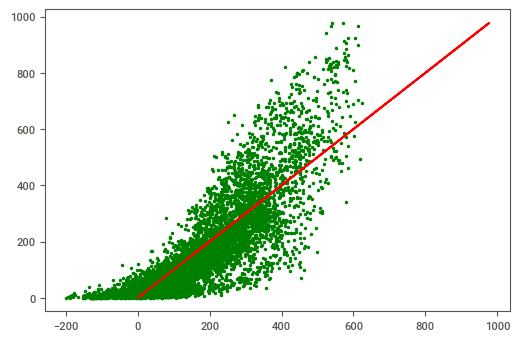

In [121]:
plt.figure()
plt.plot(linear_predictions, bike_share_target_test, 'g.')
plt.plot(bike_share_target_test, bike_share_target_test, 'r-')
plt.show()


In [122]:
r_squared = metrics.r2_score(bike_share_target_test, linear_predictions)
linear_mse = metrics.mean_squared_error(bike_share_target_test, linear_predictions)
linear_rsme = np.sqrt(linear_mse)

print("rsquared", r_squared)
print("linear_mse", linear_mse)
print("linear rmse", linear_rsme)

rsquared 0.681858881776355
linear_mse 10250.576897827319
linear rmse 101.24513271178678


Here we see that we have a higher r squared value and a lower root mean squared error.  Categorizing all of the data gave us a better fit.  One point to bring up is that at values larger than the mean, the lack of categorization led to underestimating the number of rentals and adding categorization to the variables led to over estimation

In [123]:
def plot_predictions(true_values, predicted_values, title = ""):
    plt.figure()
    plt.plot(true_values, predicted_values,'.')
    plt.plot(true_values, true_values, 'r-')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.show()


In [124]:
def score_model(true_values, predicted_values):

    model_score = {
        "rsquared" : metrics.r2_score(true_values, predicted_values),
        "mse" : metrics.mean_squared_error(true_values, predicted_values),
        "rmse" : np.sqrt(metrics.mean_squared_error(true_values, predicted_values))
        }
        
    return model_score

In [125]:
def fit_and_score(regressor, train, target_train, test, target_test, title = ""):

    print(title)

    ## fitting the data and predicting:
    model = regressor.fit(train, target_train)
    predictions = model.predict(test)

    ## plotting the predictions by the true values
    plot_predictions(target_test, predictions)

    ## scoring and printing
    model_scores = score_model(target_test, predictions)
    for score in model_scores:
        print(score, model_scores[score])

    print("\n\n---------------------")



In [126]:
regressors = {

    "Decision Tree" : tree.DecisionTreeRegressor(random_state=0),
    "Random Forest" : ensemble.RandomForestRegressor(random_state=0, n_estimators=30),
    "Stochastic Gradient Decent" : linear_model.SGDRegressor(max_iter=1000, tol=1e3),
    "Lasso Regression" : linear_model.Lasso(alpha=.1),
    "Ridge Regression": linear_model.Ridge(alpha=.5),
    "Elastic Net": linear_model.ElasticNet(random_state=0),
    "Bagging" : ensemble.BaggingRegressor()
    
}



Decision Tree


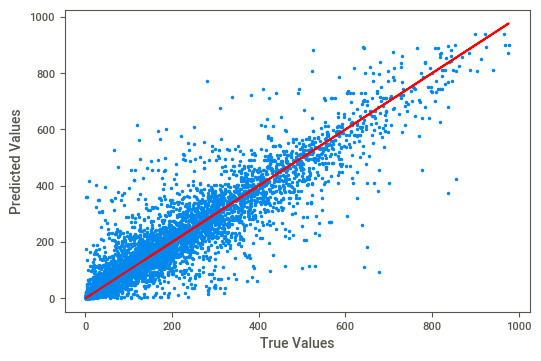

rsquared 0.8316652915565048
mse 5423.781380753138
rmse 73.64632632218078


---------------------
Random Forest


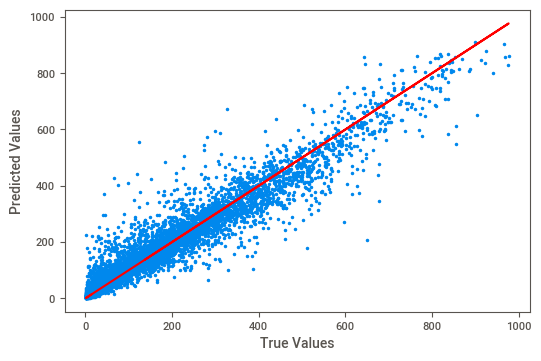

rsquared 0.9110772758920012
mse 2865.1097554531057
rmse 53.52672001396224


---------------------
Stochastic Gradient Decent


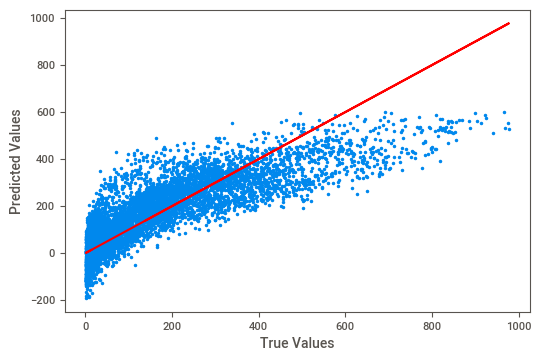

rsquared 0.6792376056020615
mse 10335.034993483316
rmse 101.66137414713278


---------------------
Lasso Regression


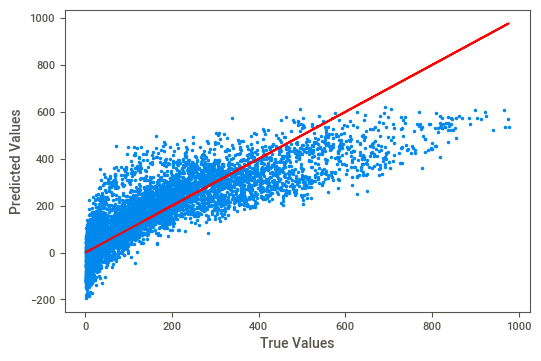

rsquared 0.6821760246728652
mse 10240.358483852953
rmse 101.19465639969806


---------------------
Ridge Regression


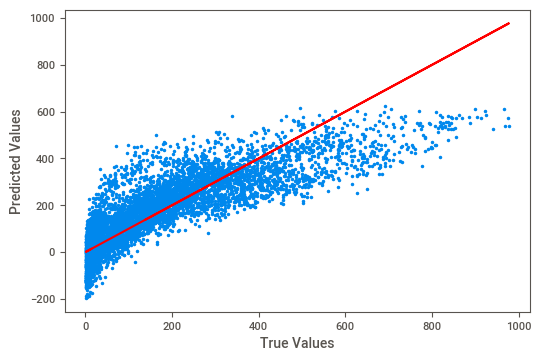

rsquared 0.6819070741255705
mse 10249.02412972152
rmse 101.23746406208286


---------------------
Elastic Net


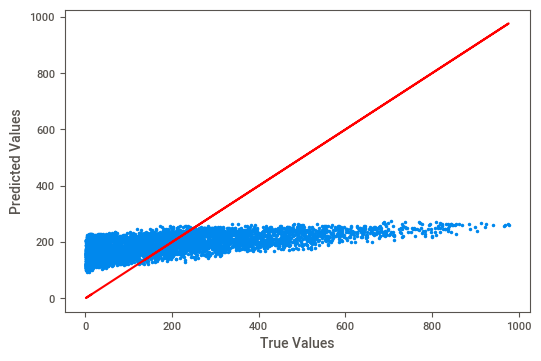

rsquared 0.19518293000647968
mse 25931.38325129425
rmse 161.03224289344743


---------------------
Bagging


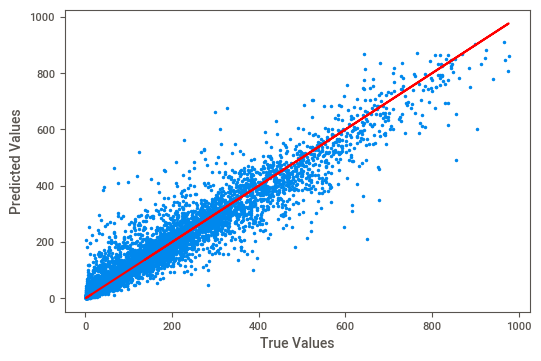

rsquared 0.9000254741102476
mse 3221.2012429538586
rmse 56.75562741221225


---------------------


In [127]:
for regressor in regressors:
    fit_and_score(regressors[regressor], bike_share_train, bike_share_target_train, bike_share_test, bike_share_target_test, regressor)

## Part 4: 
### Model Tuning
1) Take the top three performing models and implement cross-validation on
them. ▪ Hint: They should be Decision Tree Regressor, RandomForestRegressor, and BaggingRegressor.
2) Take your top performing model (mine was the RandomForestRegressor)
and do a randomize search cv with 20 iterations and three folds.
▪ I found it is best to set your n_jobs = (# of cpu’s you have – 1). This
took about 10 minutes on my MacBook with 4 CPUs and 8 GB of
memory.  Your param distributions should include the following:
    1) Bootstrap: true, false
    2) Max_depth: 10-110
    3) number of bins: 11
    4) Max_features: auto, sqrt
    5) Min_samples_split: 2,5,10
    6) Min_samples_leaf: 1,2,4
    7) 200 – 2000, number of bins 10
3) Take your best_estimator_ and see how it compares by doing cross_vals
for r2, mse, and calculating rmse.
4) Finally, run predictions on your test set with this model, and see how your r2 score and
RMSE look.

In [128]:
class CrossValidatedModel:

    def __init__(self, regressor, train_data, target, test_data, target_test):
        self.model = self._cross_validate(regressor, train_data, target)
        self.predictions = self._predict(test_data)
        self.mse = metrics.mean_squared_error(self.predictions, target_test)
        self.rmse = np.sqrt(self.mse)
        self._target_test = target_test


    def _cross_validate(self, regressor, train_data, target):
        cross_validation = model_selection.cross_validate(regressor, train_data, target, return_estimator = True)
        max_score = max(cross_validation["test_score"])
        max_score_index = list(cross_validation["test_score"]).index(max_score)
        best_model = cross_validation["estimator"][max_score_index]
        return best_model
    
    def _predict(self, test_data):
        return self.model.predict(test_data)

    def _plot(self):
        plt.figure()
        plt.plot(self.predictions, self._target_test,'.')
        plt.plot(self._target_test, self._target_test,'r-')
        plt.title("Model Accuracy")
        plt.ylabel("True Values")
        plt.xlabel("Predictions")
        plt.show()

    def display_results(self):
        print("rmse", self.rmse)
        self._plot()
        


In [129]:
best_models = {
    "tree" : tree.DecisionTreeRegressor(),
    "random_forest" : ensemble.RandomForestRegressor(),
    "bagging" : ensemble.BaggingRegressor()
}

tree
rmse 75.1218361860686


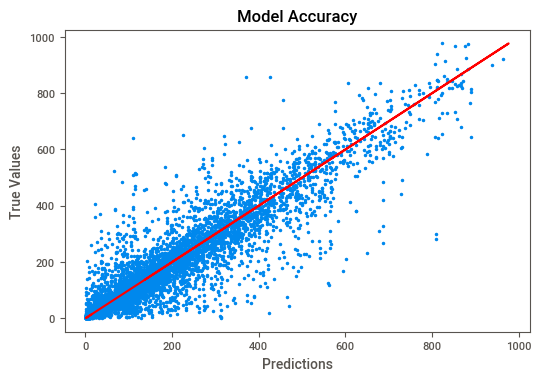

random_forest
rmse 54.7726618841057


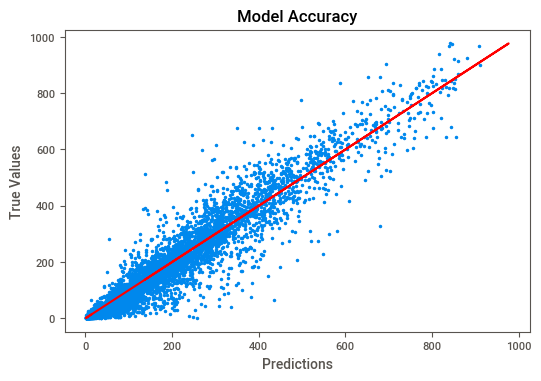

bagging
rmse 58.399783708385364


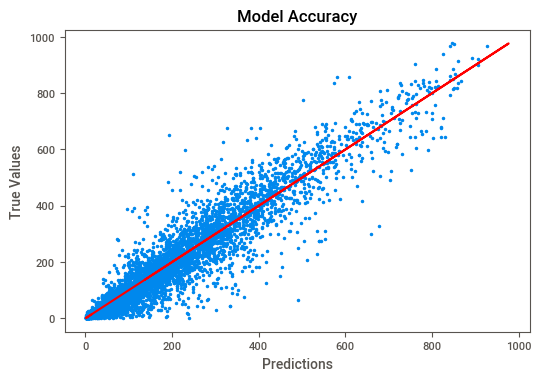

In [130]:
for regressor in best_models:
    print(regressor)
    cross_validated = CrossValidatedModel(best_models[regressor], bike_share_train, bike_share_target_train, bike_share_test, bike_share_target_test)
    cross_validated.display_results()
    

In [131]:
hyperparameters = {
    "bootstrap": [True, False],
    "max_depth": [i for i in range(10,110,10)],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [132]:
###Just checking to see what the parameters are for a random forest regressor to create the hyper parameter dict.  
random_forrest_regressor = ensemble.RandomForestRegressor(random_state=0)
random_forrest_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [133]:
random_search_cv = model_selection.RandomizedSearchCV(random_forrest_regressor, hyperparameters, n_jobs = 11)

In [134]:
forrest_random_search_model = random_search_cv.fit(bike_share_train, bike_share_target_train)

In [135]:
forrest_random_search_model_params = forrest_random_search_model.best_params_
forrest_random_search_model_params

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [136]:
forrest_random_search_predictions = forrest_random_search_model.predict(bike_share_test)

In [137]:
forrest_optimized_mse = metrics.mean_squared_error(forrest_random_search_predictions, bike_share_target_test)
forrest_optimized_rmse = np.sqrt(forrest_optimized_mse)
forrest_optimized_rsquared = metrics.r2_score(forrest_random_search_predictions, bike_share_target_test)

optimized rmse:  54.076789933816016
optimized rsquared:  0.8957180668266025


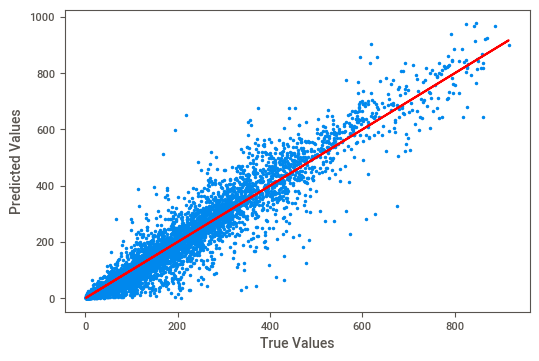

In [138]:
print("optimized rmse: ", forrest_optimized_rmse)
print("optimized rsquared: ", forrest_optimized_rsquared)

plot_predictions(forrest_random_search_predictions, bike_share_target_test)

# Conclusions:

In conclusion, if we observe our random forrest model, the initial random forest model has a rmse of ~51, while the cross validated model has a worse rmse of ~53, and the random search validation has a rmse of ~50.  Our random search cv of the random forest gave us the best results.  